## impoting the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')
print(df)

     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [6]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Extracting x and y from the dataset

In [7]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

## Feature scalling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

## Splitting the x and y into training and test set

In [10]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.2, random_state = 0)

## creating and training the SVM classification model

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(x_tr,y_tr)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Predicting the class for the test data

In [13]:
y_pr = classifier.predict(x_te)

## as mse rmse and r2_score in regression we have confusion matrix and accuracy score in classification

0.9125


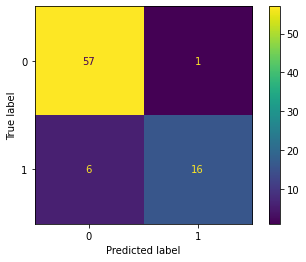

In [15]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(estimator=classifier,X=x_te, y_true=y_te)
acc = accuracy_score(y_te,y_pr)
print(acc)

## visualizing the output(using mlxtend library)

c:\users\gurvansh singh\appdata\local\programs\python\python38\lib\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


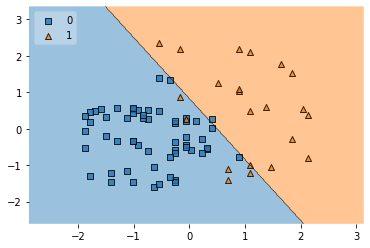

In [17]:
# legend indicates the number of classes we have in our data. we can go upto 3d to plot
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(clf=classifier, X=x_te, y=y_te, legend=2)
plt.show()

# Assignment
## Check the accuracy of the svm model using different kernels